# IE 582 - HW2 - Kürşat Gürsoy

## TASK 1 

In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics.pairwise as smp

### Task 1 - Part A 

In [2]:
data = pd.read_csv(r'C:\Users\IKG\Desktop\HW2_Files\IE582_Fall21_HW2_q1_data.csv') # Reading data

In [3]:
data

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a
...,...,...,...
193,-0.662932,1.886934,b
194,0.316428,1.974810,b
195,-1.625464,-1.165275,b
196,-1.378755,-1.448804,b


In [4]:
features = ['X1','X2']  # Our features are X1 and X2

In [5]:
f = data.loc[:, features].values # Separated the features

In [6]:
f = StandardScaler().fit_transform(f) # Features are standardized

In [7]:
# PCA Projection to 1D
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(f)
principal_data = pd.DataFrame(data = principalComponents , columns = ['principal component 1'])

In [8]:
final_data = pd.concat([principal_data, data[['class']]], axis = 1) # Concatenated the DataFrames, obtained final data

In [9]:
final_data.index = final_data.index + 1 #Indexes are arranged
final_data = final_data.sort_index()

In [10]:
final_data_ClassA = final_data[final_data['class']=='a']
final_data_ClassB = final_data[final_data['class']=='b']

In [11]:
indexA = final_data_ClassA.index
indexB = final_data_ClassB.index

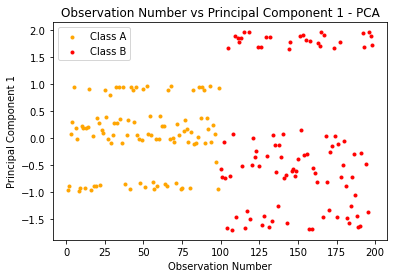

In [12]:
# Obtained the Plot for PCA
plt.scatter(indexA, final_data_ClassA.loc[:,'principal component 1'], color='orange', marker= '.', label='Class A')
plt.scatter(indexB, final_data_ClassB.loc[:,'principal component 1'], color='red', marker= '.',label='Class B')
plt.title('Observation Number vs Principal Component 1 - PCA')
plt.xlabel('Observation Number')
plt.ylabel('Principal Component 1')
plt.legend()
plt.show()

### Task 1 - Part B

In [13]:
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import MDS 

In [14]:
features = ['X1','X2']  # Our features are X1 and X2

In [15]:
data_f = data.loc[:, features] # Separated the features

In [16]:
data_c = data.loc[:, ['class']] # Separated class

In [17]:
model_1d = MDS(n_components=1, metric=True, n_init=4, max_iter=500, verbose=0, eps=0.001, dissimilarity='euclidean') 
# Used Euclidean distance

In [18]:
data_f_tr = model_1d.fit_transform(data_f)

In [19]:
data_f_tr = pd.DataFrame(data_f_tr, columns=['principal component 1']) 

In [20]:
fin_data_1 = pd.concat([data_f_tr, data_c], axis = 1) # Concatenated the DataFrames, obtained final data

In [21]:
fin_data_1.index = fin_data_1.index + 1  # Indexes are arranged
fin_data_1 = fin_data_1.sort_index()

In [22]:
fin_data_ClassA_1 = fin_data_1[fin_data_1['class']=='a']
fin_data_ClassB_1 = fin_data_1[fin_data_1['class']=='b']

In [23]:
indexA_1 = fin_data_ClassA_1.index
indexB_1 = fin_data_ClassB_1.index

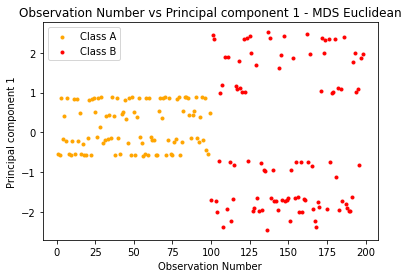

In [24]:
# Obtained the First Plot for MDS (Euclidean)
plt.scatter(indexA_1, fin_data_ClassA_1.loc[:,'principal component 1'], color='orange', marker= '.', label='Class A')
plt.scatter(indexB_1, fin_data_ClassB_1.loc[:,'principal component 1'], color='red', marker= '.',label='Class B')
plt.title('Observation Number vs Principal component 1 - MDS Euclidean')
plt.xlabel('Observation Number')
plt.ylabel('Principal component 1')
plt.legend()
plt.show()

In [25]:
data_ff = smp.manhattan_distances(data_f) # Manhattan Distance (L1 norm) matrix # My second similarity measure.
data_ff = pd.DataFrame(data_ff, columns=data_f.index, index=data_f.index) 

In [26]:
model_1d_v2 = MDS(n_components=1, metric=True, n_init=4, max_iter=500, verbose=0, eps=0.001, dissimilarity='precomputed')
# Our distance matrix is precomputed, can be seen in above cell.

In [27]:
data_f_tr_2 = model_1d_v2.fit_transform(data_ff)

In [28]:
data_f_tr_2 = pd.DataFrame(data_f_tr_2, columns=['principal component 1']) 

In [29]:
fin_data_2 = pd.concat([data_f_tr_2, data_c], axis = 1) # Concatenated the DataFrames, obtained final data

In [30]:
fin_data_2.index = fin_data_2.index + 1 # Indexes are arranged
fin_data_2 = fin_data_2.sort_index()

In [31]:
fin_data_ClassA_2 = fin_data_2[fin_data_2['class']=='a']
fin_data_ClassB_2 = fin_data_2[fin_data_2['class']=='b']

In [32]:
indexA_2 = fin_data_ClassA_2.index 
indexB_2 = fin_data_ClassB_2.index

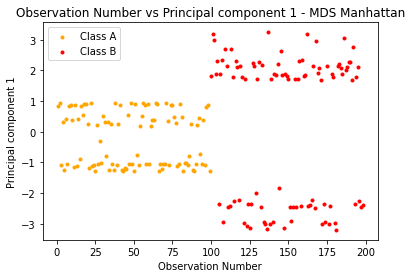

In [33]:
# Obtained the Second Plot for MDS (Manhattan)
plt.scatter(indexA_2, fin_data_ClassA_2.loc[:,'principal component 1'], color='orange', marker= '.', label='Class A')
plt.scatter(indexB_2, fin_data_ClassB_2.loc[:,'principal component 1'], color='red', marker= '.',label='Class B')
plt.title('Observation Number vs Principal component 1 - MDS Manhattan')
plt.xlabel('Observation Number')
plt.ylabel('Principal component 1')
plt.legend()
plt.show()

### Task 1 - Part C 

#### Question 1
From the first figure,which is for the PCA results, it can be seen that Class A is distributed in [0,0.5] range and 
it is also distributed around points 1 and -1. On the other hand, Class B is distributed in [1.5,2], [-1,0] and [-2,-1].
It seems that we have kept most of the variance information.

#### Question 2
I have used two different similarity measures, Euclidean and Manhattan distances and figures are shown above. 
It is observed that the range of Principal Component 1 in the Euclidean case is smaller than the range in Manhattan case.
Yet, it is also observed that the distribution of classes are similar. The ranges of Principal Component 1
for Class A are approximately the same for both cases whereas the ranges for Class B is slightly wider for Manhattan case. 
As in PCA results, we can state that we have kept most of the variance information. 

#### Question 3
As can be seen from the figures, there are sharp distinctions between Class A and Class B in MDS cases. Yet, in the PCA case,
distribution of these two classes seems slightly overlapped and it is more complex. Also, for the PCA case, 
the range for Principal Component 1 is slightly smaller than the two cases of MDS. The reason for that may be the 
standardization process in PCA. To conclude, I think that MDS has separeted Class A and Class B sharply in both cases, whereas
PCA seems to be more responsive to small changes in Principal Component 1 value, especially for the [-1,0] range.

### Task 1 - Part D 

In [34]:
# Created new columns
data['X1_sq'] = data['X1']*data['X1']
data['X2_sq'] = data['X2']*data['X2']
data['X1X2'] = data['X1']*data['X2']

In [35]:
#data # Checked the data

In [36]:
features = ['X1','X2','X1_sq','X2_sq','X1X2']  # Our features

In [37]:
data_f = data.loc[:, features] # Separated the features

In [38]:
f = StandardScaler().fit_transform(data_f) # Features are standardized

In [39]:
pca = PCA()

In [40]:
f_pca = pca.fit_transform(f)

In [41]:
covariance_mat = np.cov(f.T) # Covariance matrix is created

In [42]:
eigen_vals, eigen_vecs = np.linalg.eig(covariance_mat)

In [43]:
print("Eigenvalue by Each Component: \n", pca.explained_variance_) # Eigenvalues

Eigenvalue by Each Component: 
 [1.72864657 1.33129182 0.95027351 0.64143034 0.37373847]


In [44]:
print("Percentage of Variance Explained by Each Component:\n", pca.explained_variance_ratio_)#same as eigen_vals/sum(eigen_vals)

Percentage of Variance Explained by Each Component:
 [0.34398321 0.26491363 0.18909483 0.12763816 0.07437018]


In [45]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Percentage of Variance Explained Cumulatively:\n", cum_var_exp)

Percentage of Variance Explained Cumulatively:
 [0.34398321 0.60889683 0.79799166 0.92562982 1.        ]


In [46]:
Summary_EigenVectors=pd.DataFrame(eigen_vecs, ['X1','X2','X1_sq','X2_sq','X1X2'], ['Comp1','Comp2','Comp3','Comp4','Comp5'])

In [47]:
Summary_EigenVectors #Eigenvector by Each Component

,Comp1,Comp2,Comp3,Comp4,Comp5
X1,-0.419197,-0.414702,-0.556375,0.571217,-0.128269
X2,-0.538445,-0.600082,0.454384,-0.368432,0.088149
X1_sq,0.538767,-0.523790,-0.162472,-0.273001,-0.578314
X2_sq,-0.350668,0.356405,0.312947,0.127154,-0.797435
X1X2,0.348012,-0.257959,0.599707,0.668783,0.073662


We obtained three important results of PCA : Eigenvalues, Percentage of Variance Explained by Each Component and Eigenvectors.
Firstly, Eigenvalues for each component is calculated. Larger eigenvalue means the component(feature) explains more
variance, thus, the second important result, Percentage of Variance Explained by Each Component is found by using eigenvalue.
This percentage is basically the ratio of components' eigenvalue to sum of all components'eigenvalues. I demonstrated this
percentages both indivually and cumulatively. As can be seen, we can keep roughly %60 variance information of the data 
by using two components.
At last, I obtained eigenvectors. These vectors show the parameters values in the equation of each component.
For instance, if we chechk eigenvector of Comp1, we can interpret it as: 
Comp1 = (-0.419197)*X1 + (-0.538445)*X2 + 0.538767*X1^2 + (-0.350668)*X2^2 + 0.348012*X1*X2

Below, I will try to make 2D projection.

In [48]:
x = data.loc[:, features].values
# Separating out the target
y = data.loc[:,['class']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [49]:
pca_new = PCA(n_components=2)
principalComps = pca_new.fit_transform(x)
principalData = pd.DataFrame(data = principalComps, columns = ['Comp1', 'Comp2'])

In [50]:
finalData = pd.concat([principalData, data[['class']]], axis = 1)

In [51]:
finalData_ClassA = finalData[finalData['class']=='a']
finalData_ClassB = finalData[finalData['class']=='b']

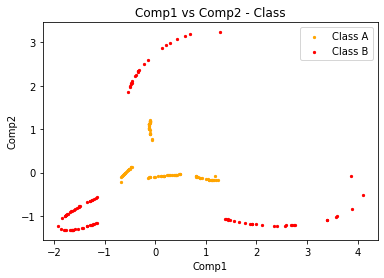

In [52]:
# Applied PCA with two components and obtained the below Plot.
plt.scatter(finalData_ClassA.loc[:,'Comp1'], finalData_ClassA.loc[:,'Comp2'], color='orange', marker= '.', label='Class A',s=20)
plt.scatter(finalData_ClassB.loc[:,'Comp1'], finalData_ClassB.loc[:,'Comp2'], color='red', marker= '.',label='Class B',s=20)
plt.title('Comp1 vs Comp2 - Class')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()
plt.show()

## TASK 2 

In [53]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import sklearn.metrics.pairwise as smp
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import MDS 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [54]:
data_dist = pd.read_excel(r'C:\Users\IKG\Desktop\HW2_Files\ilmesafe_edited.xls') # Reading data

In [55]:
data_dist.rename(index=data_dist['İL ADI'], inplace=True) # Arranging dataset
data_dist = data_dist.drop(columns=['İL ADI'])

In [56]:
data_dist = data_dist.fillna(0) # Filled diagonal NaN elements with 0

In [57]:
data_dist = (data_dist + data_dist.T - np.diag(np.diag(data_dist)))/2 
# I have taken averages of upper and lower triangular matrices to make distance matrix symmetric.

In [58]:
data_dist # Checked the dataset. It seems fine.

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,...,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
ADANA,0.0,335.0,575.0,966.0,603.0,529.5,535.0,1035.0,874.0,903.0,...,621.0,709.0,782.0,1042.0,1067.5,899.0,714.0,246.0,87.0,735.0
ADIYAMAN,335.0,0.0,910.0,648.0,632.0,778.0,870.0,751.0,1209.0,1238.0,...,303.0,471.0,1025.5,758.0,749.5,1149.5,957.5,210.0,248.0,978.5
AFYONKARAHİSAR,575.0,910.0,0.0,1318.0,597.0,278.0,290.5,1243.0,345.0,328.0,...,1196.0,1284.0,515.0,1351.0,1445.0,338.0,447.0,821.0,662.0,375.0
AĞRI,966.0,648.0,1318.0,0.0,737.0,1097.5,1428.0,396.0,1640.0,1568.0,...,369.0,430.0,1174.0,309.0,143.0,1362.0,1105.0,814.0,879.0,1191.0
AMASYA,603.0,632.0,597.0,737.0,0.0,373.0,825.0,694.0,938.0,831.0,...,796.0,982.0,437.0,782.0,864.0,625.0,368.0,641.5,610.5,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YALOVA,899.0,1149.5,338.0,1362.0,625.0,407.0,600.5,1254.0,510.0,216.0,...,1411.0,1559.5,371.0,1362.0,1489.0,0.0,350.0,1122.5,986.5,171.0
KARABÜK,714.0,957.5,447.0,1105.0,368.0,215.0,733.5,970.0,788.0,556.0,...,1163.0,1349.0,89.0,1078.0,1232.0,350.0,0.0,930.5,801.0,179.0
KİLİS,246.0,210.0,821.0,814.0,641.5,712.5,781.0,917.0,1120.0,1149.0,...,469.0,557.0,998.5,924.0,915.5,1122.5,930.5,0.0,159.0,951.5
OSMANİYE,87.0,248.0,662.0,879.0,610.5,579.0,622.0,948.0,961.0,990.0,...,534.0,622.0,869.0,955.0,980.5,986.5,801.0,159.0,0.0,822.0


In [59]:
np.random.seed(2345) # Used in order to get the same result for each run

In [60]:
model_2d_tr = MDS(n_components=2, metric=True, n_init=4, max_iter=800, verbose=0, eps=0.001, dissimilarity='precomputed')
# similarity is precomputed.

In [61]:
data_dist_v2 = model_2d_tr.fit_transform(data_dist)

In [62]:
data_dist_v2 = pd.DataFrame(data_dist_v2,index=data_dist.index ,columns=['Dimension 1','Dimension 2']) 

In [63]:
data_dist_v3 = MinMaxScaler().fit_transform(data_dist_v2) # Standardization is made.

In [64]:
data_dist_v3 = pd.DataFrame(data_dist_v3,index=data_dist.index ,columns=['Dimension 1','Dimension 2']) 

In [65]:
data_dist_v3 # It seems fine.

,Dimension 1,Dimension 2
ADANA,0.416771,0.742513
ADIYAMAN,0.595483,0.828101
AFYONKARAHİSAR,0.212162,0.429697
AĞRI,0.924041,0.668525
AMASYA,0.554505,0.395351
...,...,...
YALOVA,0.227973,0.197335
KARABÜK,0.413276,0.230126
KİLİS,0.510630,0.851537
OSMANİYE,0.460564,0.784484


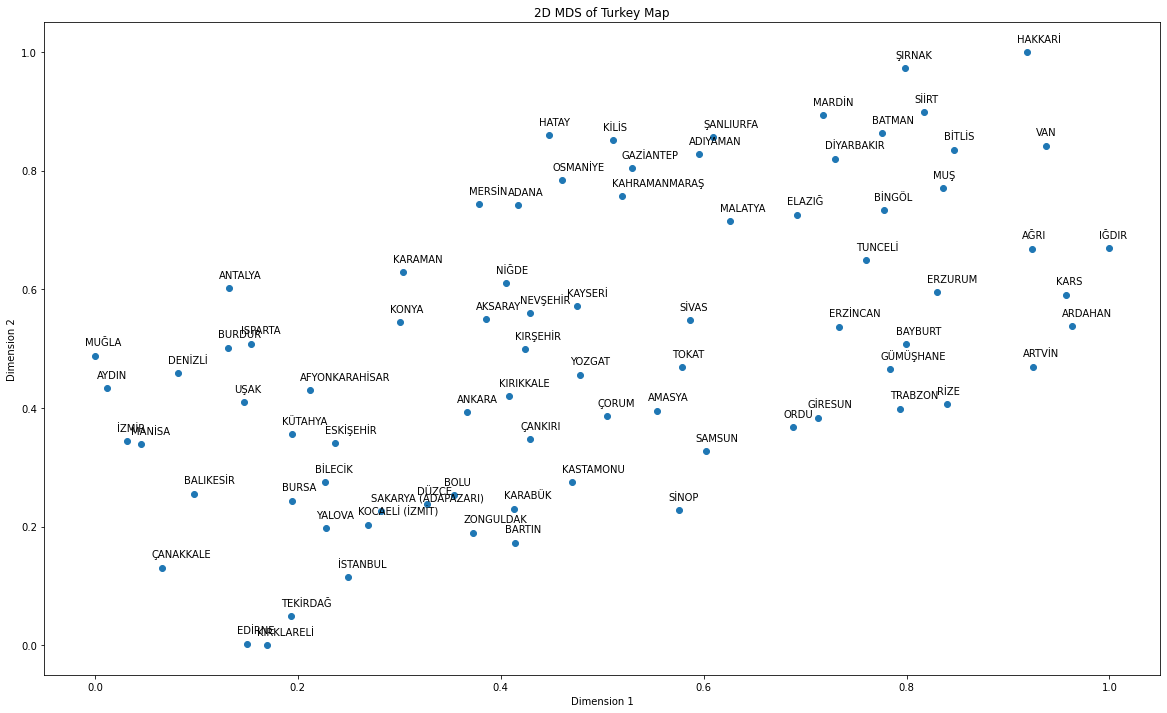

In [66]:
# I have plotted the TR Map below. It seems very similar to the real one. If we can take its symmetric, it will be more clear
# to see its similarity to the real one. In the below cell, I made small manipulation to interpret easily.
plt.figure(figsize=(20,12))
plt.scatter(data_dist_v3.iloc[:,0],data_dist_v3.iloc[:,1])
plt.title('2D MDS of Turkey Map')
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
for label, x, y in zip(data_dist_v3.index, data_dist_v3.iloc[:,0], data_dist_v3.iloc[:,1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.show()

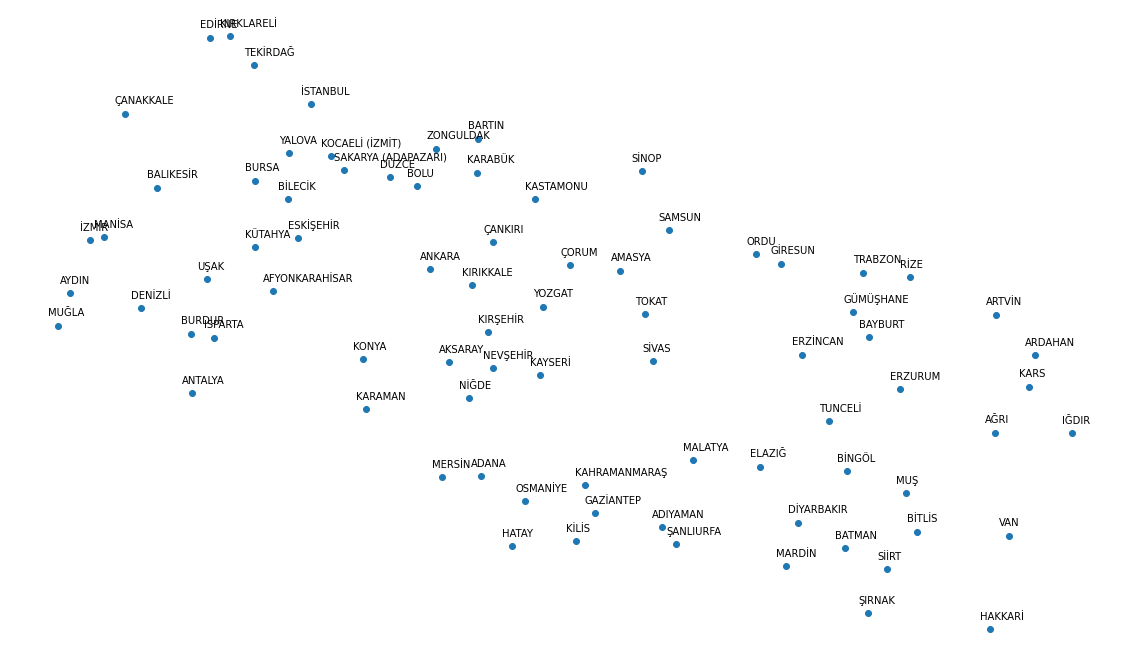

In [67]:
# Here, to see the map more clear, I have taken the negative of Dimension 2. Now it is easier to interpret this map. 
# Indeed, it is similar to the real one more than I expected. It seems that there are no obvious errors, yet, as I stated 
# before, I needed to do that manipulation in order to see it clearly. The plot we obtained in above cell was the Turkey map 
# symmetrical to Dimension 1. 
# Note : Instead of taking the negative of Dimension 2, I could have changed the places of two dimensions in the plot.
plt.figure(figsize=(20,12))
plt.scatter(data_dist_v3.iloc[:,0],-data_dist_v3.iloc[:,1])
#plt.title('2D MDS of Turkey Map')
for label, x, y in zip(data_dist_v3.index, data_dist_v3.iloc[:,0], -data_dist_v3.iloc[:,1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-10, 10),
        textcoords = 'offset points'
    )
plt.axis(False)
plt.show()

## TASK 3 

In [68]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.metrics.pairwise as smp
from sklearn.datasets import make_swiss_roll 
from sklearn.manifold import MDS 
from sklearn.preprocessing import MinMaxScaler

### Task 3 - Part A 

In [69]:
# Reading the data (I converted the files into txt before reading the data)
X_data = pd.read_fwf(r'C:\Users\IKG\Desktop\HW2_Files\uWaveGestureLibrary_X_TRAIN.txt', header=None)
Y_data = pd.read_fwf(r'C:\Users\IKG\Desktop\HW2_Files\uWaveGestureLibrary_Y_TRAIN.txt', header=None)
Z_data = pd.read_fwf(r'C:\Users\IKG\Desktop\HW2_Files\uWaveGestureLibrary_Z_TRAIN.txt', header=None)

In [70]:
# Acceleration data is separated from class for each axis
X_accl = X_data.iloc[:,1:316] 
Y_accl = Y_data.iloc[:,1:316]
Z_accl = Z_data.iloc[:,1:316]
Class = X_data.iloc[:,0] # Class info is same for three axis.

In [71]:
print(X_accl.shape, Y_accl.shape, Z_accl.shape) # Acceleration info for each axis has 896 rows 315 columns. 

(896, 315) (896, 315) (896, 315)


In [72]:
# Created velocity dataframes for each axis.
for i in ('X','Y','Z'):
    locals()[str(i)+"_velocity"] = np.cumsum(locals()[str(i)+"_accl"],axis=1)

In [73]:
# Created position dataframes for each axis.
for i in ('X','Y','Z'):
    locals()[str(i)+"_position"] = np.cumsum(locals()[str(i)+"_velocity"],axis=1)

In [74]:
# Here, the first index that satisfies Class = i (for i in 1 to 8) is attained to Class_i for plotting purposes.
for i in list(range(1,9)): 
    locals()["Class_"+str(i)] = Class[Class==i].index[0]

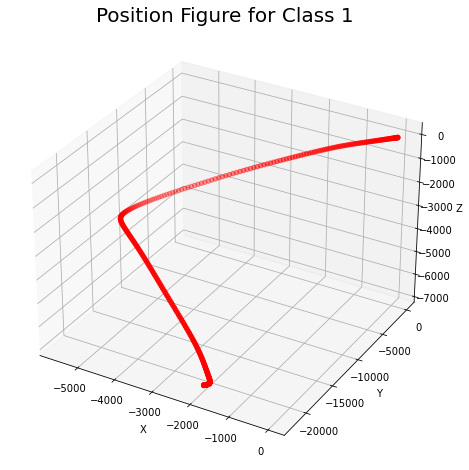

In [75]:
# Creating Position Figure for Class 1
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_1],Y_position.iloc[Class_1],Z_position.iloc[Class_1], c='r')
ax.set_title("Position Figure for Class 1",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

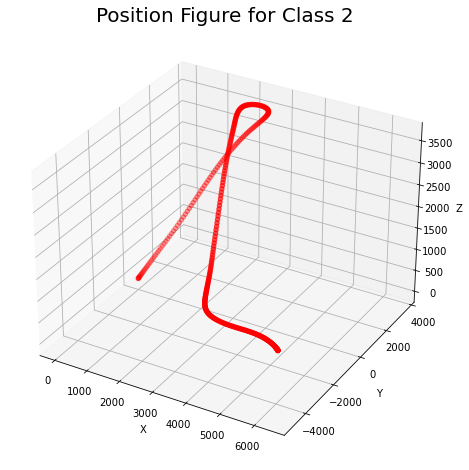

In [76]:
# Creating Position Figure for Class 2
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_2],Y_position.iloc[Class_2],Z_position.iloc[Class_2], c='r')
ax.set_title("Position Figure for Class 2",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

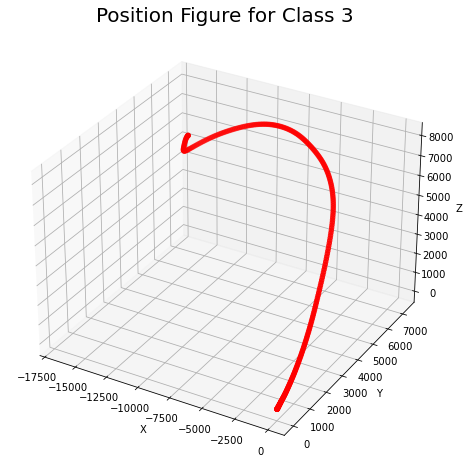

In [77]:
# Creating Position Figure for Class 3
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_3],Y_position.iloc[Class_3],Z_position.iloc[Class_3], c='r')
ax.set_title("Position Figure for Class 3",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

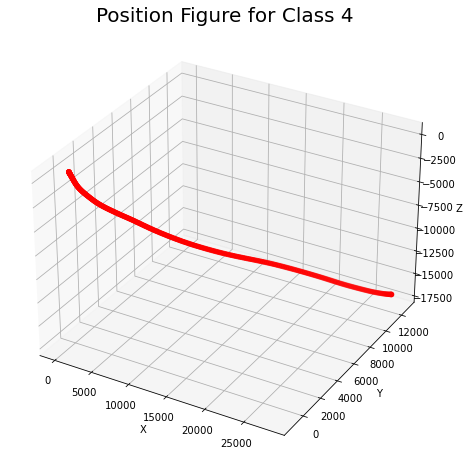

In [78]:
# Creating Position Figure for Class 4
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_4],Y_position.iloc[Class_4],Z_position.iloc[Class_4], c='r')
ax.set_title("Position Figure for Class 4",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

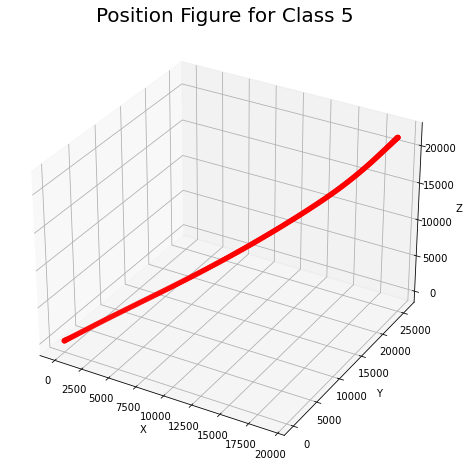

In [79]:
# Creating Position Figure for Class 5
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_5],Y_position.iloc[Class_5],Z_position.iloc[Class_5], c='r')
ax.set_title("Position Figure for Class 5",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

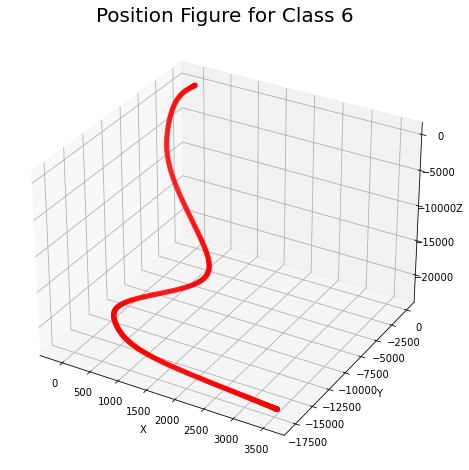

In [80]:
# Creating Position Figure for Class 6
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_6],Y_position.iloc[Class_6],Z_position.iloc[Class_6], c='r')
ax.set_title("Position Figure for Class 6",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

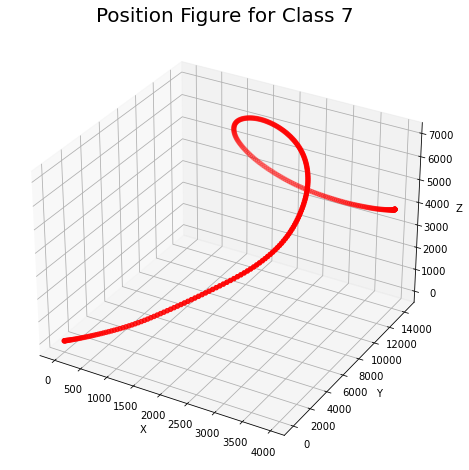

In [81]:
# Creating Position Figure for Class 7
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_7],Y_position.iloc[Class_7],Z_position.iloc[Class_7], c='r')
ax.set_title("Position Figure for Class 7",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

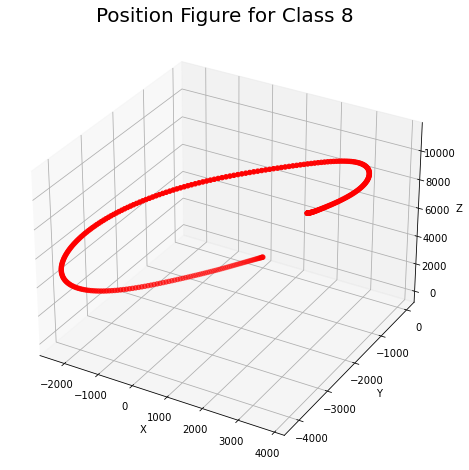

In [82]:
# Creating Position Figure for Class 8
fig = plt.figure(figsize = (20, 8))
ax = plt.axes(projection ="3d")
# Creating plot
ax.scatter3D(X_position.iloc[Class_8],Y_position.iloc[Class_8],Z_position.iloc[Class_8], c='r')
ax.set_title("Position Figure for Class 8",fontsize= 20)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# show plot
plt.show()

### Task 3 - Part B 

In [83]:
df = pd.concat([X_position, Y_position, Z_position], axis=1) # Concatenated position informations

In [84]:
print(df.shape) #896 rows, 945 columns

(896, 945)


In [85]:
# For indices satisfying class = i, for i in 1 to 8, we made PCA after standardizing the corresponding data.
# eigen_vectors_class_i is created for all classes. It includes 2 eigenvectors.(2 comps)
# Finally, for each class, percentage of variance explained by the first 2 components are printed.
for i in list(range(1,9)):
    indices = (Class==i)
    df_v2 = df[indices]
    df_v2 = StandardScaler().fit_transform(df_v2)
    pca = PCA()
    pca.fit(df_v2)
    locals()["eigen_vectors_class_"+str(i)] = pca.components_[:2] # 2 Eigenvectors for 2 Components for each Class
    print("Class "+str(i)+": Percentage of Variance Explained by the First 2 Components:\n", pca.explained_variance_ratio_[:2])

Class 1: Percentage of Variance Explained by the First 2 Components:
 [0.36966562 0.29027302]
Class 2: Percentage of Variance Explained by the First 2 Components:
 [0.36230287 0.2618317 ]
Class 3: Percentage of Variance Explained by the First 2 Components:
 [0.43817706 0.31170629]
Class 4: Percentage of Variance Explained by the First 2 Components:
 [0.4569475  0.31017346]
Class 5: Percentage of Variance Explained by the First 2 Components:
 [0.49471339 0.3142459 ]
Class 6: Percentage of Variance Explained by the First 2 Components:
 [0.46151183 0.30701989]
Class 7: Percentage of Variance Explained by the First 2 Components:
 [0.49507987 0.21823016]
Class 8: Percentage of Variance Explained by the First 2 Components:
 [0.43192425 0.29235755]


As can be seen from above, when we examine all classes together, the first 2 components are explaining minimum %65 and 
maximum %80 of the variance information, which can be interpreted as a good result.

In [86]:
#eigen_vectors_class_1.shape # (2, 945) # I checked the shape

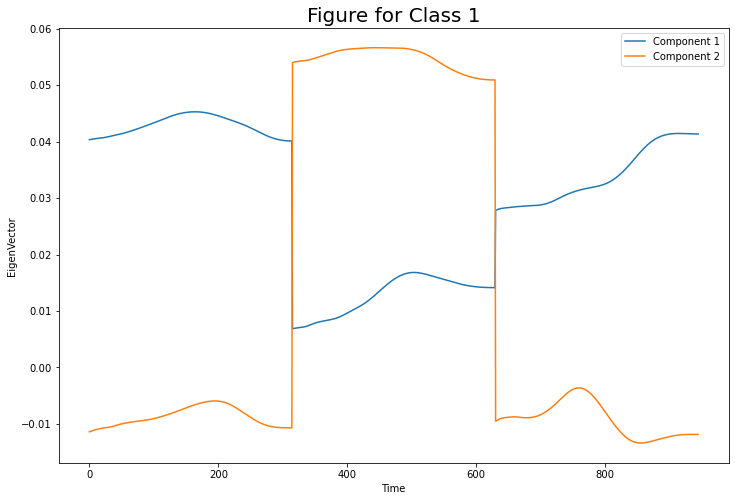

In [87]:
# Plotting is made for Class 1 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_1.shape[1])),eigen_vectors_class_1[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_1.shape[1])),eigen_vectors_class_1[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 1',fontsize= 20)
plt.legend()
plt.show()

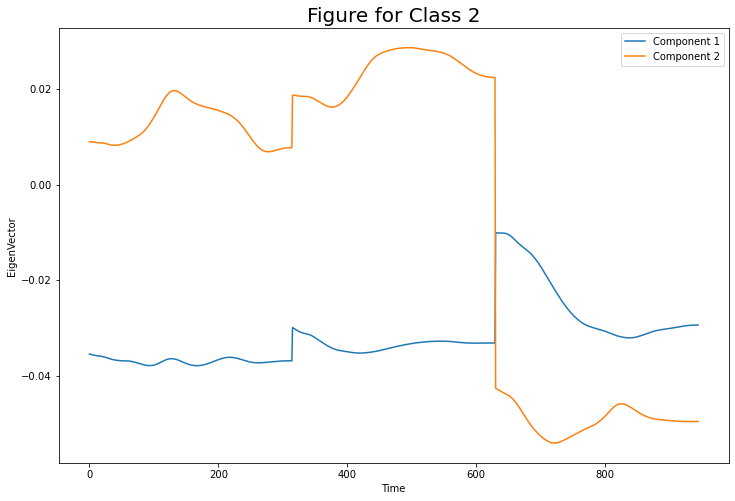

In [88]:
# Plotting is made for Class 2 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_2.shape[1])),eigen_vectors_class_2[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_2.shape[1])),eigen_vectors_class_2[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 2',fontsize= 20)
plt.legend()
plt.show()

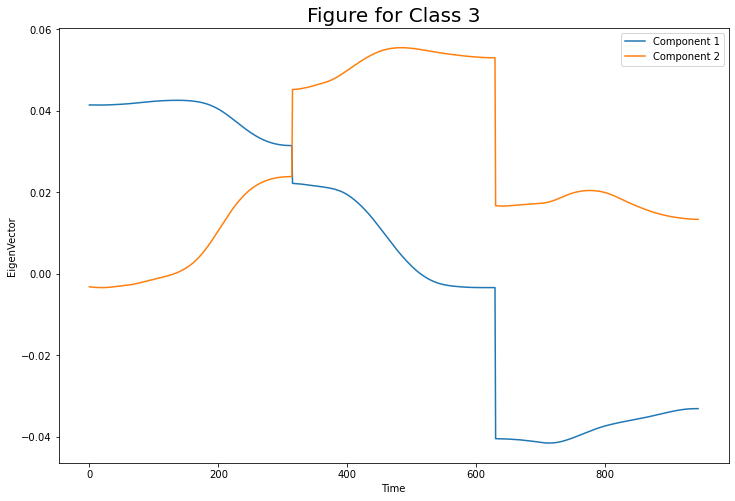

In [89]:
# Plotting is made for Class 3 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_3.shape[1])),eigen_vectors_class_3[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_3.shape[1])),eigen_vectors_class_3[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 3',fontsize= 20)
plt.legend()
plt.show()

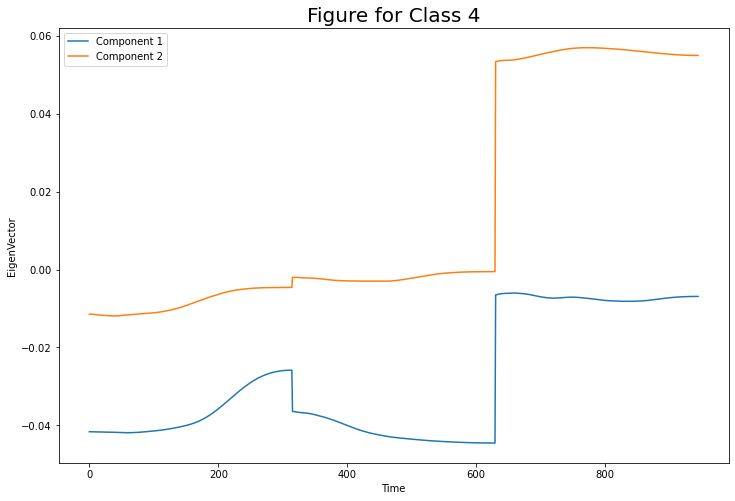

In [90]:
# Plotting is made for Class 4 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_4.shape[1])),eigen_vectors_class_4[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_4.shape[1])),eigen_vectors_class_4[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 4',fontsize= 20)
plt.legend()
plt.show()

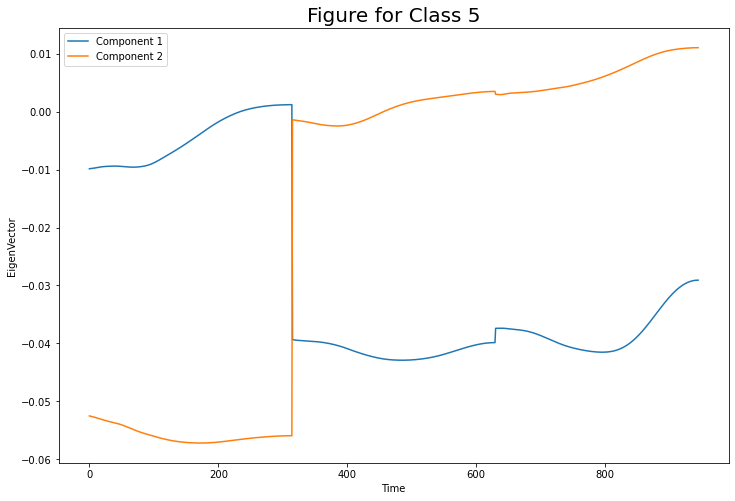

In [91]:
# Plotting is made for Class 5 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_5.shape[1])),eigen_vectors_class_5[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_5.shape[1])),eigen_vectors_class_5[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 5',fontsize= 20)
plt.legend()
plt.show()

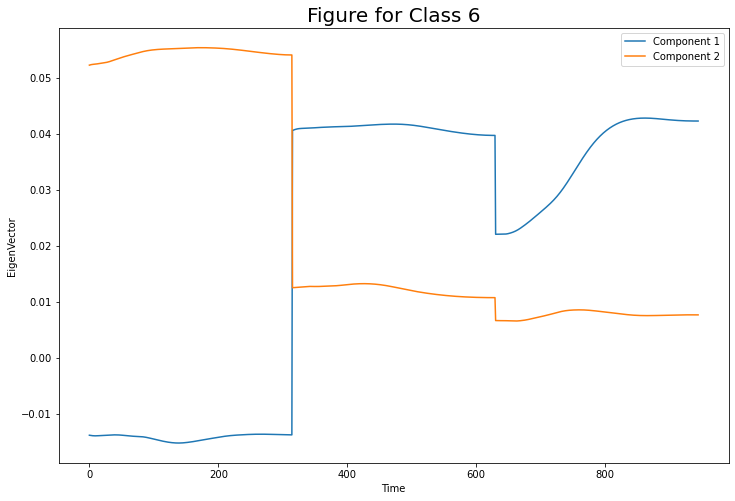

In [92]:
# Plotting is made for Class 6 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_6.shape[1])),eigen_vectors_class_6[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_6.shape[1])),eigen_vectors_class_6[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 6',fontsize= 20)
plt.legend()
plt.show()

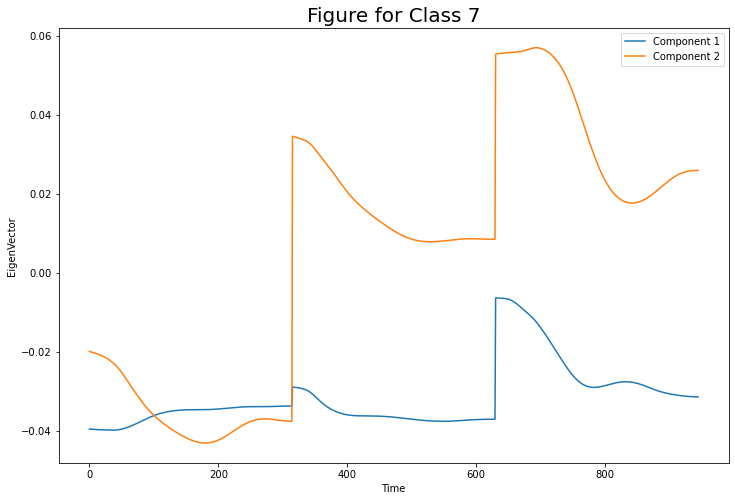

In [93]:
# Plotting is made for Class 7 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_7.shape[1])),eigen_vectors_class_7[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_7.shape[1])),eigen_vectors_class_7[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 7',fontsize= 20)
plt.legend()
plt.show()

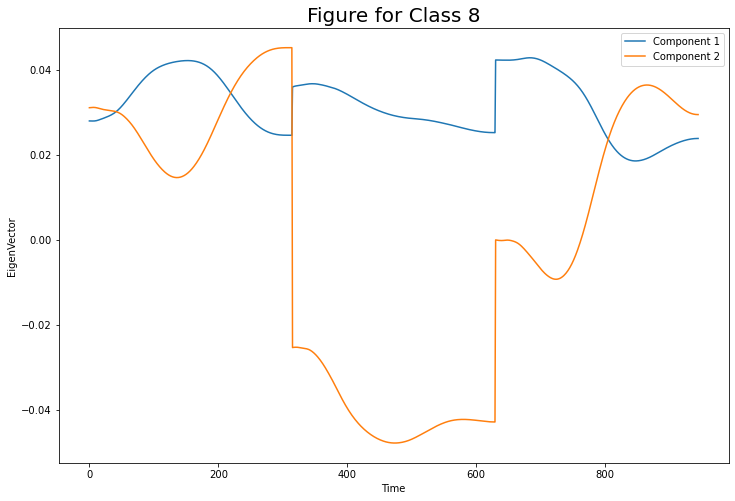

In [94]:
# Plotting is made for Class 8 
fig = plt.figure(figsize = (12, 8))
plt.plot(list(range(eigen_vectors_class_8.shape[1])),eigen_vectors_class_8[0],label = "Component 1")
plt.plot(list(range(eigen_vectors_class_8.shape[1])),eigen_vectors_class_8[1],label = "Component 2")
plt.xlabel('Time')
plt.ylabel('EigenVector')
plt.title('Figure for Class 8',fontsize= 20)
plt.legend()
plt.show()

#### Observations about Figures
It is seen that in all figures above after 315 time points there is a dramatic change in both components for almost each class. 
Indeed, it is not surprising since we concatenated position information of 3 axis and applied PCA into this dataframe. 
So, these sharp changes around 315th and 630th time points is not surprising.

The coefficients of eigenvector can help us interpreting the variance contribution of each axis. For different type of gestures
there are different amounts of variance information provided by the each axis. For instance, for the Class 8, which is a 
circular gesture, plotted eigenvector shows us that all three axis provide important variance information. On the other hand,
if we check Class 4, it can be seen that Z axis provides relatively higher variance information compared to X and Y axis.


In [95]:
import os

In [96]:
os.system('jupyter nbconvert --to html HW2_Final.ipynb')

0